## Importing neccessary modules 

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn.metrics as metrics

In [2]:
raw=pd.read_csv(r"K:\Desktop\NIIT\Challenge\Course_10\DS2_C6_S4_CarSales_Data_Challenge.csv")
cars=raw.drop("__year_resale_value",axis=1)

## Preprocessing

In [3]:
def preprocess(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    encoder = LabelEncoder()
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0],inplace=True)
        df[col] = encoder.fit_transform(df[col])
    scaler = MinMaxScaler()
    for item in num_cols:
        df[item].fillna(df[item].mean(),inplace=True)
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df
final=preprocess(cars)

In [4]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    int32  
 1   Model               157 non-null    int32  
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    int32  
 4   Price_in_thousands  157 non-null    float64
 5   Engine_size         157 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Wheelbase           157 non-null    float64
 8   Width               157 non-null    float64
 9   Length              157 non-null    float64
 10  Curb_weight         157 non-null    float64
 11  Fuel_capacity       157 non-null    float64
 12  Fuel_efficiency     157 non-null    float64
 13  Latest_Launch       157 non-null    int32  
 14  Power_perf_factor   157 non-null    float64
dtypes: float64(11), int32(4)
memory usage: 16.1 KB


In [5]:
final=final.iloc[:,[2,3,4,5,6,8,9,10,12,13,14]].copy()

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales_in_thousands  157 non-null    float64
 1   Vehicle_type        157 non-null    int32  
 2   Price_in_thousands  157 non-null    float64
 3   Engine_size         157 non-null    float64
 4   Horsepower          157 non-null    float64
 5   Width               157 non-null    float64
 6   Length              157 non-null    float64
 7   Curb_weight         157 non-null    float64
 8   Fuel_efficiency     157 non-null    float64
 9   Latest_Launch       157 non-null    int32  
 10  Power_perf_factor   157 non-null    float64
dtypes: float64(9), int32(2)
memory usage: 12.4 KB


In [7]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.35,min_samples=11)
labels=db.fit_predict(final[["Width","Length"]])

final["Clusters"]=labels+1
X=final
x=final

In [8]:
colors=["red","green","orange","gray"]

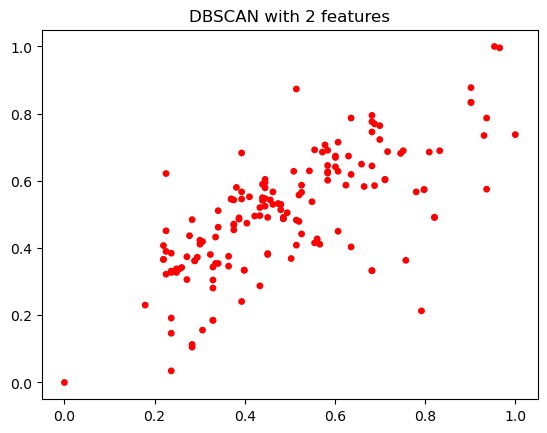

In [9]:
plt.scatter(final[["Width"]], X[["Length"]], c=X['Clusters'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title("DBSCAN with 2 features")
plt.show()

In [10]:
from sklearn.neighbors import NearestNeighbors
neighs=NearestNeighbors(n_neighbors=5)
neighs.fit(x)
distances,index=neighs.kneighbors()

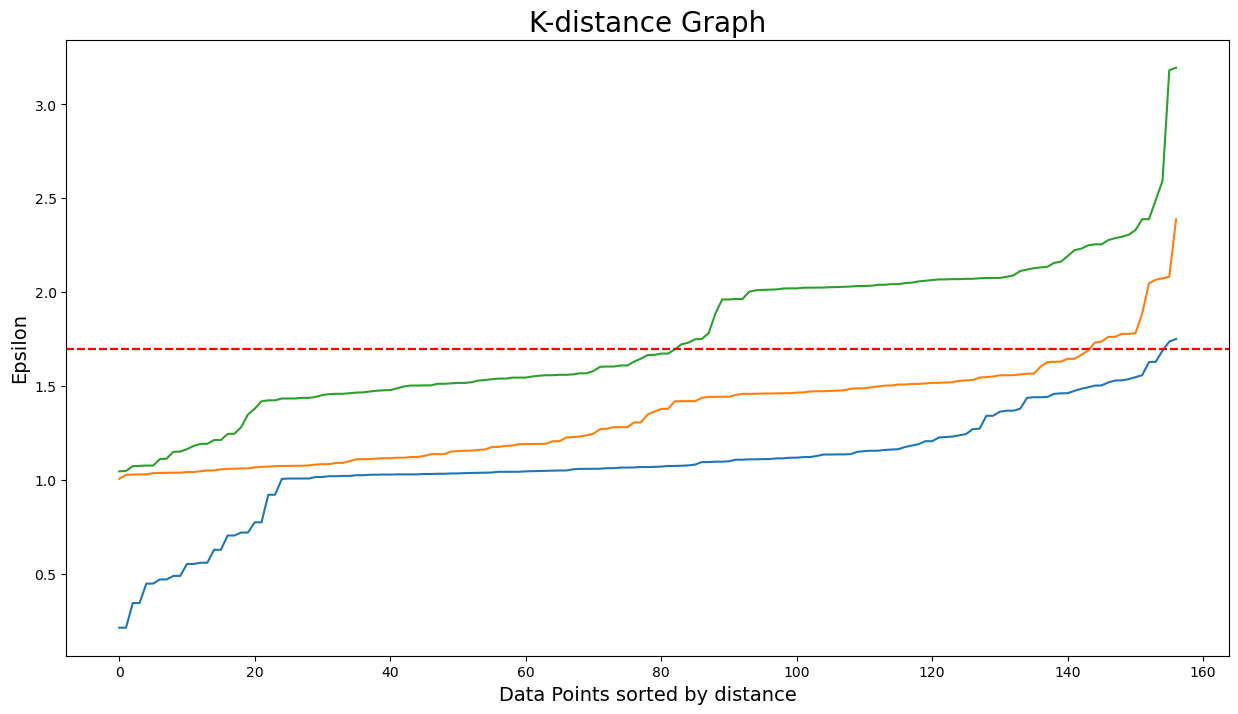

In [11]:
distances=np.sort(distances,axis=0)
distances=pd.DataFrame(distances)
plt.figure(figsize=(15,8))
for i in range(0,3):
    plt.plot(distances[[i]])
    plt.axhline(y=1.7, color='r', linestyle='--')
    plt.title('K-distance Graph',fontsize=20)
    plt.xlabel('Data Points sorted by distance',fontsize=14)
    plt.ylabel('Epsilon',fontsize=14)
plt.show()

## Ideal eps is 1.7

## Best min number of samples

In [20]:
eps=1.56
for min_samples in [5,4,3,6]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(x)
    x1= cluster_labels +2
    y = np.bincount(x1)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    print()

eps= 1.56 | min_samples=  5 | obtained clustering:  [(1, 130), (2, 5), (3, 6), (4, 8), (5, 3), (6, 5)]

eps= 1.56 | min_samples=  4 | obtained clustering:  [(1, 56), (2, 12), (3, 10), (4, 6), (5, 6), (6, 8), (7, 8), (8, 7), (9, 10), (10, 8), (11, 4), (12, 6), (13, 8), (14, 4), (15, 4)]

eps= 1.56 | min_samples=  3 | obtained clustering:  [(1, 5), (2, 13), (3, 43), (4, 42), (5, 4), (6, 7), (7, 9), (8, 16), (9, 5), (10, 8), (11, 5)]

eps= 1.56 | min_samples=  6 | obtained clustering:  [(1, 151), (2, 6)]



In [21]:
db=DBSCAN(eps=1.56,min_samples=5)
y_hc=db.fit_predict(x)
x["Db_labels"]=y_hc+1

In [23]:
print("The Clusters and count of elements are : \n",x.Db_labels.value_counts())

The Clusters and count of elements are : 
 0    130
3      8
2      6
1      5
5      5
4      3
Name: Db_labels, dtype: int64


## Conclusion:
In this case, the output of DBSCAN indicates that there are 6 clusters in the data set, identified by the numbers 0, 1, 2, 3, 4, and 5. The largest cluster is cluster 0, which contains 130 data points. Clusters 3, 2, 1, 5, and 4 are smaller, with 8, 6, 5, 5, and 3 data points, respectively.

